In [95]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = r'D:\output\noisuy\group_1_SR_0_interpolated.csv'
df = pd.read_csv(file_path)

df.head()


,lat,lon,SR_0
0,22.402206,102.174025,4.965293
1,22.372206,102.174025,3.681895
2,22.402206,102.204025,4.860792
3,22.372206,102.204025,4.382563
4,22.342206,102.204025,1.987619


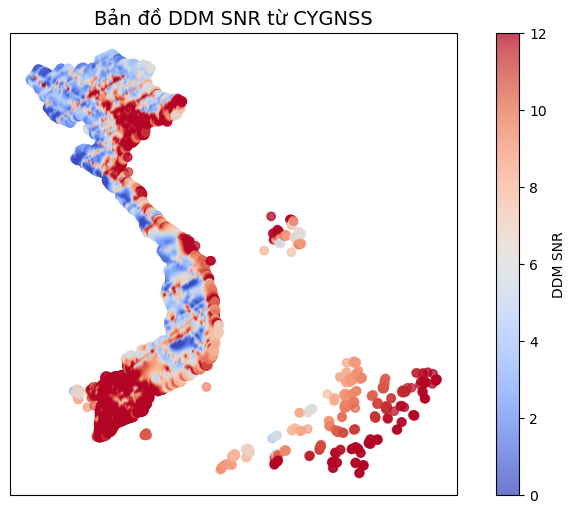

In [97]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lọc dữ liệu cần thiết
lat = df["lat"]
lon = df["lon"]
ddm_snr = df["SR_0"]

# Tạo figure và bản đồ
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_title("Bản đồ DDM SNR từ CYGNSS", fontsize=14)

# Thêm đường bờ biển và biên giới quốc gia
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=":")

import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=12)  # Điều chỉnh theo dữ liệu thực tế
plt.scatter(lon, lat, c=ddm_snr, cmap='coolwarm', norm=norm, alpha=0.75)
plt.colorbar(label='DDM SNR')
plt.show()

# Hiển thị bản đồ
plt.show()


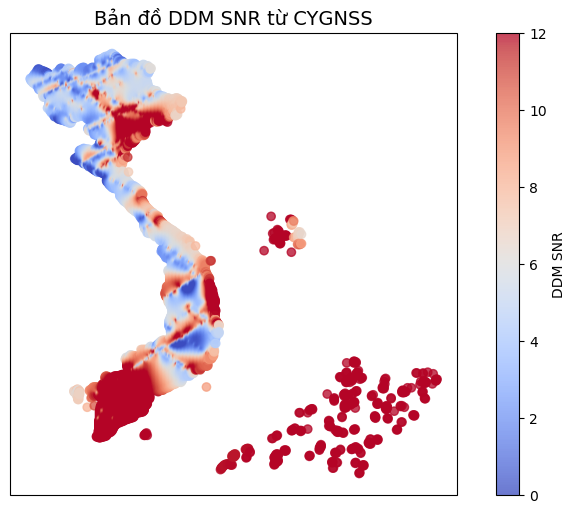

In [93]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = "D:\\output\\noisuy1\\20240831_calibrated_shp_filtered_SR_0_interpolated.csv"
df = pd.read_csv(file_path)

df.head()
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lọc dữ liệu cần thiết
lat = df["y"]
lon = df["x"]
ddm_snr = df["SR_0"]

# Tạo figure và bản đồ
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_title("Bản đồ DDM SNR từ CYGNSS", fontsize=14)

# Thêm đường bờ biển và biên giới quốc gia
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=":")

import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=12)  # Điều chỉnh theo dữ liệu thực tế
plt.scatter(lon, lat, c=ddm_snr, cmap='coolwarm', norm=norm, alpha=0.75)
plt.colorbar(label='DDM SNR')
plt.show()

# Hiển thị bản đồ
plt.show()


In [90]:
import cartopy
print(cartopy.config['data_dir'])  # Xác định thư mục cache của Cartopy


C:\Users\DELL\.local\share\cartopy


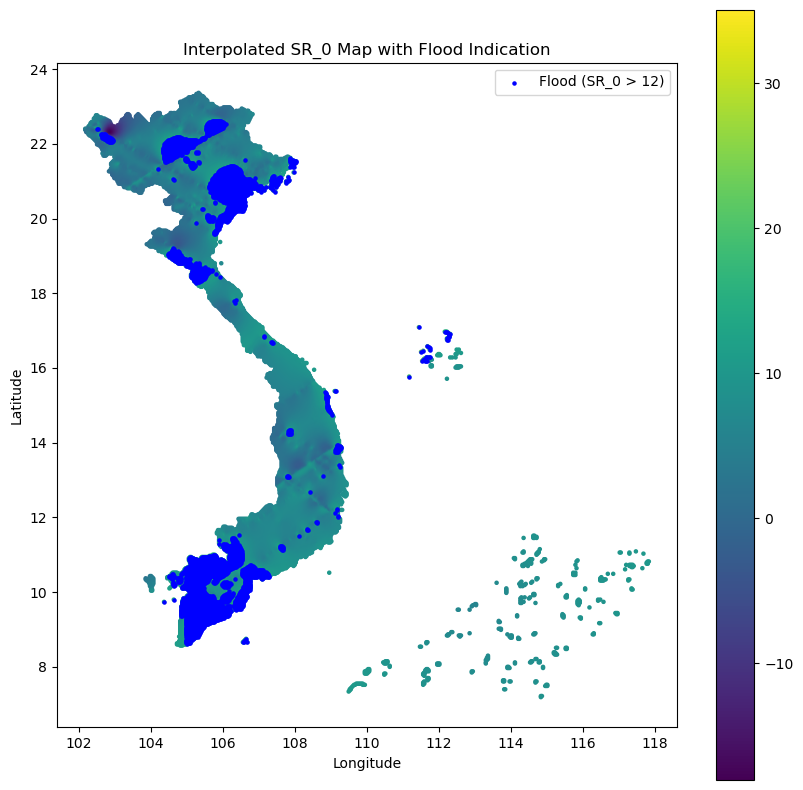

In [75]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

def plot_interpolated_map(csv_file, output_image):
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(csv_file)
    
    # Tạo GeoDataFrame từ DataFrame
    gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.x, df.y),
        crs="EPSG:4326"
    )
    
    # Lọc các giá trị SR_0 > 12
    flood_gdf = gdf[gdf['SR_0'] > 12]
    
    # Vẽ bản đồ
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Vẽ tất cả các điểm
    gdf.plot(column='SR_0', ax=ax, legend=True, cmap='viridis', markersize=5)
    
    # Vẽ các điểm SR_0 > 12 với màu xanh dương
    flood_gdf.plot(ax=ax, color='blue', markersize=5, label='Flood (SR_0 > 12)')
    
    ax.set_title('Interpolated SR_0 Map with Flood Indication')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.legend()
    
    # Lưu bản đồ ra file ảnh
    plt.savefig(output_image)
    plt.show()

def main():
    # Đường dẫn tới file CSV và file ảnh đầu ra
    csv_file = r"D:\output\noisuy1\20240901_calibrated_shp_filtered_SR_0_interpolated.csv"
    output_image = r"D:\output\noisuy\flood1.png"
    
    # Vẽ bản đồ từ file CSV
    plot_interpolated_map(csv_file, output_image)

if __name__ == "__main__":
    main()

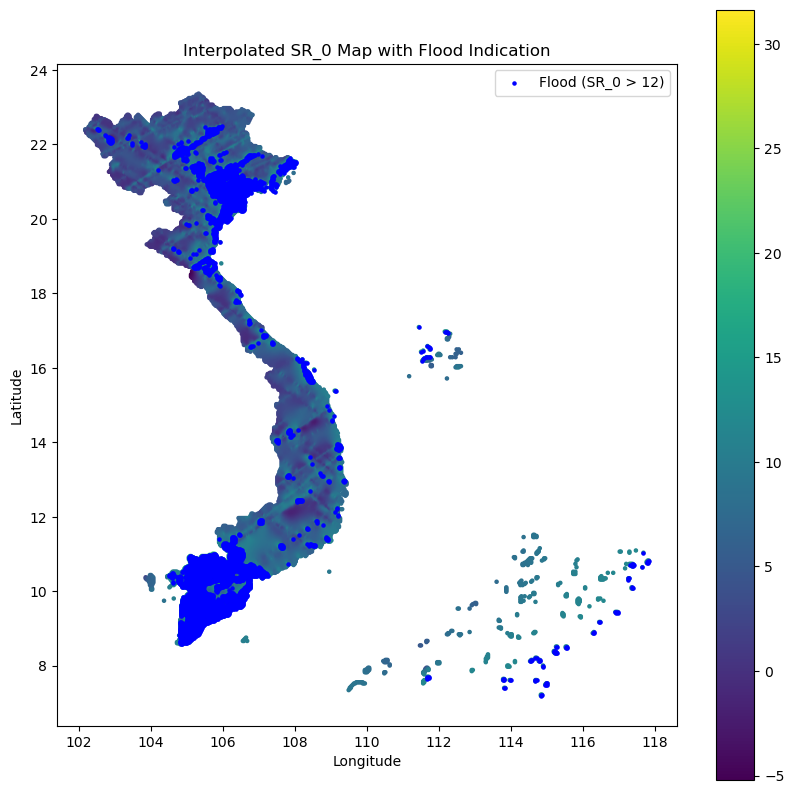

In [73]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

def plot_interpolated_map(csv_file, output_image):
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(csv_file)
    
    # Tạo GeoDataFrame từ DataFrame
    gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.lon, df.lat),
        crs="EPSG:4326"
    )
    
    # Lọc các giá trị SR_0 > 12
    flood_gdf = gdf[gdf['SR_0'] > 12]
    
    # Vẽ bản đồ
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Vẽ tất cả các điểm
    gdf.plot(column='SR_0', ax=ax, legend=True, cmap='viridis', markersize=5)
    
    # Vẽ các điểm SR_0 > 12 với màu xanh dương
    flood_gdf.plot(ax=ax, color='blue', markersize=5, label='Flood (SR_0 > 12)')
    
    ax.set_title('Interpolated SR_0 Map with Flood Indication')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.legend()
    
    # Lưu bản đồ ra file ảnh
    plt.savefig(output_image)
    plt.show()

def main():
    # Đường dẫn tới file CSV và file ảnh đầu ra
    csv_file = r"D:\\output\\noisuy\\group_1_SR_0_interpolated.csv"
    output_image = r"D:\output\noisuy\flood.png"
    
    # Vẽ bản đồ từ file CSV
    plot_interpolated_map(csv_file, output_image)

if __name__ == "__main__":
    main()